In [10]:
from matplotlib import pyplot as plt
import datetime
import numpy as np
plt.style.use('ggplot')

def box_plot(ax, data, pos, fill_color, edge_color):
    bp = ax.boxplot(data, positions=pos, patch_artist=True, sym='')
    
    for element in ['boxes', 'whiskers',  'caps']:
        plt.setp(bp[element], color=edge_color, linewidth=1.5)
    plt.setp(bp['medians'], color='black',  linewidth=1.5)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)       
        
    return bp

def solver_latency(root, method, n, p, i):
    fname = "%s/%s-n%d-p%d-%d.txt" % (root, method, n, p, i)
    f = open(fname, "r")
    batch_str = "queries from a batch of"
    solver_str = "Solver has run successfully in"
    latency = []
    batch_size = []
    for line in f.readlines():
        if batch_str in line:
            tmp = line.split()
            batch_size.append(int(tmp[-5]))
        elif solver_str in line:
            tmp = line.split()
            ns = int(tmp[-3][:-3])
            latency.append(ns / 1000000.)
    return batch_size, latency

def get_all_latency(root, method, n, p, runs, normalized=False):
    latency = []
    for j in range(runs):
        b, t = solver_latency(root, method, n, p, j)
        if normalized:
            for k in range(len(t)):
                latency.append(t[k] * 1. / b[k])
        else:
            latency.extend(t)
    return latency

In [12]:
def plot_solver_box(runs, normalized=False):
    fig, axes = plt.subplots(1,3,figsize=(16, 4), sharey=True)
    for i, p in enumerate([0, 50, 100]):
        axes[i].set_title("F=%d" % p + "%", x=0.2,  y=0.85, fontsize=16)
        v1 = []
        v2 = []
        for n in [500, 5000, 50000]:
            l1 = get_all_latency(root, "orig", n, p, runs, normalized)
            l2 = get_all_latency(root, "scope", n, p, runs, normalized)
            v1.append(l1)
            v2.append(l2)
        bp1 = box_plot(axes[i], v1, list(range(3)), 'C0', 'C0')
        bp2 = box_plot(axes[i], v2, [.2,1.2,2.2], 'C1', 'C1')
        axes[i].set_ylim(1, 20000)
        axes[i].set_yscale("log")
        axes[i].set_yticks([1, 10, 100, 1000, 10000])
        axes[i].set_yticklabels([1, 10, r"$10^2$", r"$10^3$", r"$10^4$"], fontsize=14)
        axes[i].yaxis.set_tick_params(width=2)
        axes[i].xaxis.set_tick_params(width=2)
        axes[i].set_xticks([.1,1.1,2.1])
        axes[i].set_xticklabels(["500",  "5000", "50000"], fontsize=14)
    axes[1].set_xlabel("# nodes", fontsize=20)
    axes[0].set_ylabel("Latency (ms)", fontsize=20)
    fig.legend([bp1["boxes"][0], bp2["boxes"][0]], 
               ['+ivm', '+ivm+pushdown'], bbox_to_anchor=(0.7, 1.05), 
                   frameon=False, fontsize=18, ncol=2,)
    plt.subplots_adjust(wspace = 0.05)
    plt.savefig("solver-box.pdf", dpi=300, bbox_inches='tight')

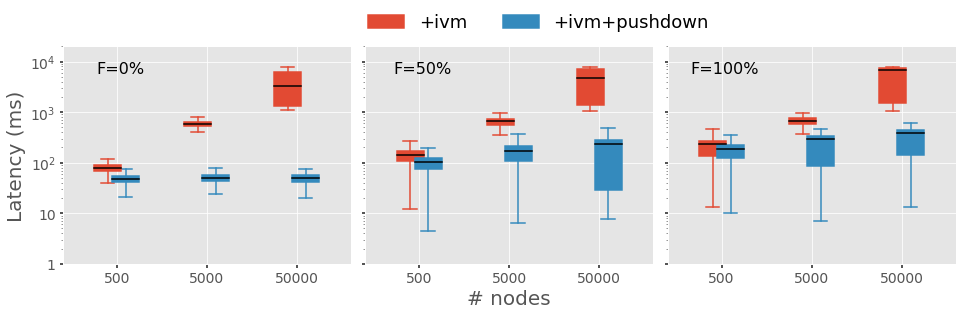

In [13]:
# Root directory of the log files. Default is artifact/traces
root = "traces"
# Number of runs per configuration
num_runs = 5
plot_solver_box(num_runs)